# DeepDriveMD with fs-peptide

## Configuration

- Node count: 10 nodes on Summit, 60 GPUs
- Iteration count: 5
- contact matrix size: [22,22,1] for fs-peptide
- Simulation length: 5ns for the first and then 1ns
- Retraining interval: every 5th iteration i.e. iter1 out of 5 iterations
- Walltime: 1+ hours


In [2]:
import pandas as pd

## Raw data (collected manually)

In [1]:
res={'md': [349, 340, 420, 443, 785], 
     'hdf5': [4, 0, 0, 0, 0], 
     'cvae': [637, 0, 0, 0, 0], 
     'infer': [4, 5, 335, 334, 335]}
res

{'md': [349, 340, 420, 443, 785],
 'hdf5': [4, 0, 0, 0, 0],
 'cvae': [637, 0, 0, 0, 0],
 'infer': [4, 5, 335, 334, 335]}

## Accumulated stage durations

Text(0.5, 0, 'fs-pep/1hr/60GPUs')

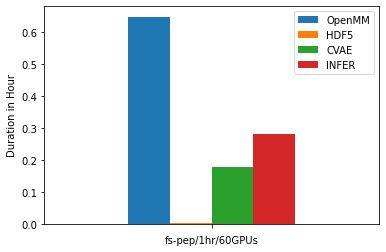

In [8]:
df = pd.DataFrame({"OpenMM": sum(res['md'])/3600,
                  "HDF5":sum(res['hdf5'])/3600,
                  "CVAE":sum(res['cvae'])/3600,
                  "INFER":sum(res['infer'])/3600},index=[''])
ax=df.plot.bar(rot=0)
ax.set_ylabel('Duration in Hour')
ax.set_xlabel('fs-pep/1hr/60GPUs')

## Stage duration on each iteration

In [5]:
index = [ "iter-%s" % x for x in range(1,6) ]

Text(0, 0.5, 'Duration in Minute')

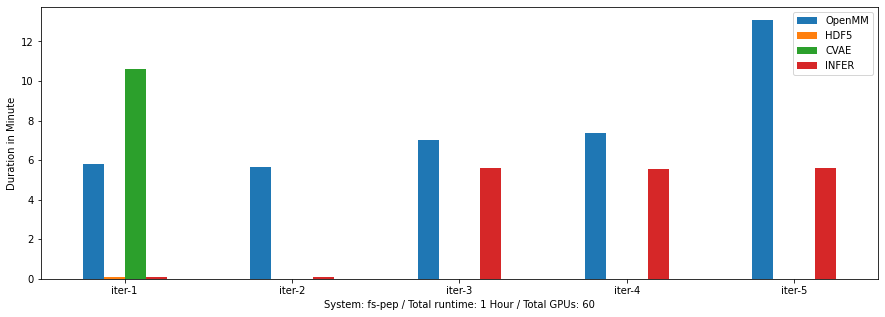

In [9]:
df = pd.DataFrame({"OpenMM": [ x / 60 for x in res['md']],
                  "HDF5":[ x / 60 for x in res['hdf5']],
                  "CVAE":[ x / 60 for x in res['cvae']],
                  "INFER":[ x / 60 for x in res['infer']]}, index=index)
ax=df.plot.bar(rot=0,figsize=(15,5))
ax.set_xlabel("System: fs-pep / Total runtime: 1 Hour / Total GPUs: 60")
ax.set_ylabel('Duration in Minute')

## TTX in seconds

In [7]:
ttx=0
for x in res:
    ttx += sum(res[x])
ttx

3991